# LISA tools introduction

## Goals of this Tutorial

- **Introduce the basis of LISA tools**
- **Introduce the how to use LISA tools**, so that you can make use of the rich toolset available.

## What is LISA
* LISA is a toolkit to analyze the behavior of Linux integrated system
* Support the study of existing behaviors
 * e.g. How does PELT work?
 * e.g. How to benchmark scheduler’s power vs performance?
* Support the analysis of new code being developed
 - Unit test / regression test
 - What is the Performance-Energy impact of new code patch on key behaviors?
* Cross-platform python language to share reproducible experiments
 - Reproduce experiments on different targets
 - Flexible and extensible APIs

## Why yet another toolkit?
- many different test suite already exist
- These are mainly black-box analyses which do not give enough insights

## what do we need?
- Simple yet powerful API to
 - Generate test workloads and execute on test targets
 - Post process collected data to produce stats, plots and reports
- opensource and free

## Bird eye view of LISA toolkit components

![alt LISA](./lisa_components.jpg)

## Get started with jupyter notebook
### What is an IPython Notebook?
### An Jupyter Notebook is a:
1. Interactive environment for writing and running code
1. Weave of code, data, document, equations, analysis, and visualization
1. Tool for prototyping new code and analysis
1. Reproducible workflow for scientific research
1. All of the above

## How can a notebook be used?
## Code Cells, Writing and Running Code ##
### Interacting with the Command Line ###

In [9]:
!ps -ef

UID        PID  PPID  C STIME TTY          TIME CMD
root         1     0  0 10月25 ?      00:00:04 /sbin/init
root         2     0  0 10月25 ?      00:00:00 [kthreadd]
root         3     2  0 10月25 ?      00:00:43 [ksoftirqd/0]
root         5     2  0 10月25 ?      00:00:00 [kworker/0:0H]
root         7     2  0 10月25 ?      00:19:12 [rcu_sched]
root         8     2  0 10月25 ?      00:00:00 [rcu_bh]
root         9     2  0 10月25 ?      00:08:47 [rcuos/0]
root        10     2  0 10月25 ?      00:00:00 [rcuob/0]
root        11     2  0 10月25 ?      00:00:00 [migration/0]
root        12     2  0 10月25 ?      00:00:09 [watchdog/0]
root        13     2  0 10月25 ?      00:00:08 [watchdog/1]
root        14     2  0 10月25 ?      00:00:00 [migration/1]
root        15     2  0 10月25 ?      00:00:40 [ksoftirqd/1]
root        17     2  0 10月25 ?      00:00:00 [kworker/1:0H]
root        18     2  0 10月25 ?      00:02:26 [rcuos/1]
root        19     2  0 10月25 ?      00:00:00 [rcuob/1]
root        20   

## Execute Code as Python

In [10]:

# A comment is a pretty boring piece of code
# This code cell generates "Hello, World" when executed

print("Hello, World")

Hello, World


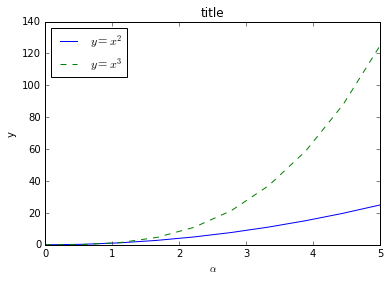

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0, 5, 10)
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b-', label="$y = x^2$")
ax.plot(x, x**3, 'g--', label="$y = x^3$")
ax.legend(loc=0); # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('y')
ax.set_title('title');

## Markdown Cells
Markdown is a popular markup language that is a superset of HTML. Its specification can be found here:
http://daringfireball.net/projects/markdown/

- Text formatting
- image
- Youtube

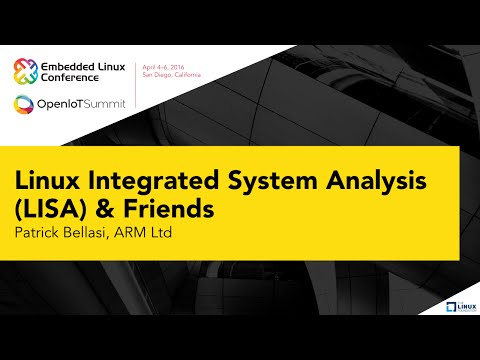

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('yXZzzUEngiU')

- Mathematical Equations

The Markdown parser included in the Jupyter Notebook is MathJax-aware. This means that you can freely mix in mathematical expressions using the MathJax subset of Tex and LaTeX.

$$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$$

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i $$

$$ \bbox[yellow,5px,border:2px solid red]
{
e^x=\lim_{n\to\infty} \left( 1+\frac{x}{n} \right)^n
\qquad (1)
}
$$

$$ {load\_avg}  = U_0  + U_1 𝑌+ U_2 𝑌^2 + … + U_{n-1} 𝑌^{n-1} $$  

[A full list of available TeX and LaTeX commands is maintained by Dr. Carol Burns.](http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm)

## Example usage scenario
## Intelligent power allocation

![alt pid](https://raw.githubusercontent.com/ivmech/ivPID/master/docs/images/pid_control.png)

In [10]:
import time

class PID:
    """PID Controller
    """

    def __init__(self, PU=0.2, PO=0.0, I=0.0, D=0.0):

        self.Kpu = PU
        self.Kpo = PO
        self.Ki = I
        self.Kd = D

        self.sample_time = 0.00
        self.current_time = time.time()
        self.last_time = self.current_time

        self.clear()

    def clear(self):
        """Clears PID computations and coefficients"""
        self.SetPoint = 0.0

        self.PTerm = 0.0
        self.ITerm = 0.0
        self.DTerm = 0.0
        self.last_error = 0.0

        # Windup Guard
        self.int_error = 0.0
        self.windup_guard = 20.0
        self.integral_cut = 0
        self.temp = 0

        self.output = 0.0

    def update(self, feedback_value):
        """Calculates PID value for given reference feedback
        .. math::
            u(t) = K_p e(t) + K_i \int_{0}^{t} e(t)dt + K_d {de}/{dt}
        .. figure:: images/pid_1.png
           :align:   center
           Test PID with Kp=1.2, Ki=1, Kd=0.001 (test_pid.py)
        """
        error = self.SetPoint - feedback_value

        self.current_time = time.time()
        delta_time = self.current_time - self.last_time
        delta_error = error - self.last_error

        if (delta_time >= self.sample_time):
            if error > 0:
                self.PTerm = self.Kpu * error
            else:
                self.PTerm = self.Kpo * error
            if error < self.integral_cut:
                self.ITerm += error * delta_time
                
#             if (self.ITerm < -self.windup_guard):
#                 self.ITerm = -self.windup_guard
#             elif (self.ITerm > self.windup_guard):
#                 self.ITerm = self.windup_guard

            self.DTerm = 0.0
            if delta_time > 0:
                self.DTerm = delta_error / delta_time

            # Remember last time and last error for next calculation
            self.last_time = self.current_time
            self.last_error = error

            self.output = self.PTerm + (self.Ki * self.ITerm) + (self.Kd * self.DTerm)
#             print "e, pid", error, self.PTerm, (self.Ki * self.ITerm), (self.Kd * self.DTerm)

    def setKp(self, proportional_gain):
        """Determines how aggressively the PID reacts to the current error with setting Proportional Gain"""
        self.Kp = proportional_gain

    def setKi(self, integral_gain):
        """Determines how aggressively the PID reacts to the current error with setting Integral Gain"""
        self.Ki = integral_gain

    def setKd(self, derivative_gain):
        """Determines how aggressively the PID reacts to the current error with setting Derivative Gain"""
        self.Kd = derivative_gain

    def setWindup(self, windup):
        """Integral windup, also known as integrator windup or reset windup,
        refers to the situation in a PID feedback controller where
        a large change in setpoint occurs (say a positive change)
        and the integral terms accumulates a significant error
        during the rise (windup), thus overshooting and continuing
        to increase as this accumulated error is unwound
        (offset by errors in the other direction).
        The specific problem is the excess overshooting.
        """
        self.windup_guard = windup

    def setSampleTime(self, sample_time):
        """PID that should be updated at a regular interval.
        Based on a pre-determined sampe time, the PID decides if it should compute or return immediately.
        """
        self.sample_time = sample_time

In [11]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline
import math

feedback_list = []
time_list = []
setpoint_list = []
out_list = []
sustain = 4500
    
def test_pid(PU = 0.2, PO = 0,  I = 0.0, D= 0.0, L=20):
    """Self-test PID class
    .. note::
        ...
        for i in range(1, END):
            pid.update(feedback)
            output = pid.output
            if pid.SetPoint > 0:
                feedback += (output - (1/i))
            if i>9:
                pid.SetPoint = 1
            time.sleep(0.02)
        ---
    """
    pid = PID(PU, PO, I, D)

    pid.SetPoint=75.0
    pid.setSampleTime(0.01)

    END = L
    feedback = 0



    for i in range(1, END):
        time.sleep(0.01)
        pid.update(feedback)
        output = pid.output
        feedback += (output) * 0.0001

        feedback_list.append(feedback)
        setpoint_list.append(pid.SetPoint)
        out_list.append(output)
        time_list.append(i)

#     time_sm = np.array(time_list)
#     time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)
#     feedback_smooth = spline(time_list, feedback_list, time_smooth)

#     plt.plot(time_smooth, feedback_smooth)
    plt.plot(time_list, setpoint_list)
    plt.plot(time_list, feedback_list)
    plt.xlim((0, L))
    plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
    plt.xlabel('time (s)')
    plt.ylabel('PID (PV)')
    plt.title('TEST PID')

    plt.ylim(0, 100)

    plt.grid(True)
    plt.show()


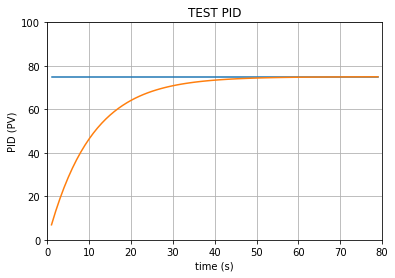

In [12]:
test_pid(920, 460, 10, 0, L=80)

## shows all the relevant (for the power allocator governor) plots for a particular run.

![alt LISA](./ipa_antutu.png)

![alt LISA](./ipa_antutu1.png)

![alt LISA](./ipa_antutu2.png)

![alt LISA](./ipa_antutu3.png)

In [1]:
import logging
reload(logging)
logging.basicConfig(
    format='%(asctime)-9s %(levelname)-8s: %(message)s',
    datefmt='%I:%M:%S')

# Enable logging at INFO level
logging.getLogger().setLevel(logging.DEBUG)
# Comment the follwing line to disable devlib debugging statements
# logging.getLogger('ssh').setLevel(logging.DEBUG)

In [2]:
# Generate plots inline
%pylab inline

import json
import os
import subprocess

# Support to access the remote target
import devlib
from env import TestEnv

# Support for trace events analysis
from trace import Trace

# Support to configure and run RTApp based workloads
from wlgen import RTA

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

Populating the interactive namespace from numpy and matplotlib


05:40:17  DEBUG   : loading JSON...
05:40:17  DEBUG   : Loaded JSON configuration:
05:40:17  DEBUG   :    {u'nrg_model': {u'big': {u'cluster': {u'nrg_max': 112}, u'cpu': {u'cap_max': 1024, u'nrg_max': 670}}, u'little': {u'cluster': {u'nrg_max': 112}, u'cpu': {u'cap_max': 1024, u'nrg_max': 670}}}, u'board': {u'big_core': u'A53_1', u'cores': [u'A53_0', u'A53_0', u'A53_0', u'A53_0', u'A53_1', u'A53_1', u'A53_1', u'A53_1'], u'modules': [u'bl', u'cpufreq', u'cpuidle']}}
05:40:17  DEBUG   : loading JSON...
05:40:17  DEBUG   : Loaded JSON configuration:
05:40:17  DEBUG   :    {u'board': {u'big_core': u'A57', u'cores': [u'A53', u'A53', u'A53', u'A53', u'A57', u'A57'], u'modules': [u'bl', u'cpufreq']}}
05:40:17  DEBUG   : loading JSON...
05:40:17  DEBUG   : Loaded JSON configuration:
05:40:17  DEBUG   :    {u'nrg_model': {u'big': {u'cluster': {u'nrg_max': 96}, u'cpu': {u'cap_max': 1024, u'nrg_max': 1715}}, u'little': {u'cluster': {u'nrg_max': 52}, u'cpu': {u'cap_max': 763, u'nrg_max': 925}}}, u

## Test environment setup

In [3]:
# Setup a target configuration
my_target_conf = {
    
    "platform"    : 'android',
    "board"       : "hikey960",
    #"device" : "0123456789ABCDEF",
    
    "ANDROID_HOME" : "/home/steven/lisa/android-sdk",
    "rtapp-calib" : {"0": 302, "1": 302, "2": 304, "3": 304, "4": 136, "5": 137, "6": 136, "7": 136},

     "emeter" : {
        "instrument" : "acme",
        "conf" : {
            # Absolute path to the iio-capture binary on the host
            'iio-capture' : '/usr/bin/iio-capture',
            # Default host name of the BeagleBone Black
           # 'ip_address'     : '10.169.36.36',
        },
        "channel_map" : {
            "Device0" : 0, # iio:device0
            #"Device1" : 1, # iio:device0
        }
    },

            
    # List of additional devlib modules to install 
    "modules" : ['cgroups', 'bl', 'cpufreq'],

    # Account to access the remote target
   # "host"        : '10.169.38.40',
    "username"    : 'root',
    "password"    : '',


}

# Setup the required Test Environment supports
my_tests_conf = {
    
    # Binary tools required to run this experiment
    # These tools must be present in the tools/ folder for the architecture
    "tools"   : ['rt-app', 'taskset', 'trace-cmd'],
    
    # FTrace events end buffer configuration
    "ftrace"  : {
         "events" : [
            "cpu_frequency",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "sched_switch",
            'dequeue_task_fair', 
            'enqueue_task_fair', 
            'set_next_entity',

                    
            "cpu_capacity",
            
            #/sys/kernel/debug/tracing/events/sched
            "sched_blocked_reason",
            "sched_boost_cpu",
            "sched_boost_task",
            "sched_contrib_scale_f",
            "sched_cpu_hotplug",
            "sched_energy_diff",
            "sched_kthread_stop",
            "sched_kthread_stop_ret",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "sched_migrate_task",
            "sched_move_numa",
            "sched_pi_setprio",
            "sched_process_exec",
            "sched_process_exit",
            "sched_process_fork",
            "sched_process_free",
            "sched_process_wait",
            "sched_stat_blocked",
            "sched_stat_iowait",
            "sched_stat_runtime",
            "sched_stat_sleep",
            "sched_stat_wait",
            "sched_stick_numa",
            "sched_swap_numa",
            "sched_switch",
            "sched_tune_boostgroup_update",
            "sched_tune_config",
            "sched_tune_tasks_update",
            "sched_tune_filter",
            "sched_wait_task",
            "sched_wake_idle_without_ipi",
            "sched_wakeup",
            "sched_wakeup_new",
            
            
         ],
         "buffsize" : 10240
    },
    "results_dir" : "fork_migration",
}

In [4]:
# Support to access the remote target
import devlib
from env import TestEnv

# Initialize a test environment using:
# the provided target configuration (my_target_conf)
# the provided test configuration   (my_test_conf)
te = TestEnv(target_conf=my_target_conf, test_conf=my_tests_conf)
target = te.target

05:40:20  INFO    : Using base path: /home/steven/lisa/lisa-github
05:40:20  INFO    : Loading custom (inline) target configuration
05:40:20  DEBUG   : Target configuration {'username': 'root', 'platform': 'android', 'emeter': {'instrument': 'acme', 'channel_map': {'Device0': 0}, 'conf': {'iio-capture': '/usr/bin/iio-capture'}}, 'board': 'hikey960', 'rtapp-calib': {'1': 302, '0': 302, '3': 304, '2': 304, '5': 137, '4': 136, '7': 136, '6': 136}, 'ANDROID_HOME': '/home/steven/lisa/android-sdk', 'password': '', 'modules': ['cgroups', 'bl', 'cpufreq']}
05:40:20  INFO    : Loading custom (inline) test configuration
05:40:20  DEBUG   : Test configuration {'username': 'root', 'platform': 'android', 'emeter': {'instrument': 'acme', 'channel_map': {'Device0': 0}, 'conf': {'iio-capture': '/usr/bin/iio-capture'}}, 'board': 'hikey960', 'rtapp-calib': {'1': 302, '0': 302, '3': 304, '2': 304, '5': 137, '4': 136, '7': 136, '6': 136}, 'ANDROID_HOME': '/home/steven/lisa/android-sdk', 'password': '', 'm

05:40:22  DEBUG   : Creating cgroup /data/local/tmp/devlib-target/cgroups/devlib_cgh4
05:40:22  DEBUG   : adb -s 0123456789ABCDEF shell echo '[ -d /data/local/tmp/devlib-target/cgroups/devlib_cgh4 ] || mkdir -p /data/local/tmp/devlib-target/cgroups/devlib_cgh4' | su
05:40:22  INFO    :   cpu          : /data/local/tmp/devlib-target/cgroups/devlib_cgh4
05:40:22  DEBUG   : Initialized [cpuacct, 1, ['cpuacct']]
05:40:22  DEBUG   : adb -s 0123456789ABCDEF shell mount
05:40:22  DEBUG   : adb -s 0123456789ABCDEF shell mount | grep "devlib_cgh1 "
05:40:22  DEBUG   : Controller cpuacct mounted under: /data/local/tmp/devlib-target/cgroups/devlib_cgh1 (noprefix=False)
05:40:22  DEBUG   : Creating cgroup /data/local/tmp/devlib-target/cgroups/devlib_cgh1
05:40:22  DEBUG   : adb -s 0123456789ABCDEF shell echo '[ -d /data/local/tmp/devlib-target/cgroups/devlib_cgh1 ] || mkdir -p /data/local/tmp/devlib-target/cgroups/devlib_cgh1' | su
05:40:23  INFO    :   cpuacct      : /data/local/tmp/devlib-target

05:40:26  DEBUG   : adb -s 0123456789ABCDEF shell cp /data/local/tmp/devlib-target/trace-cmd /data/local/tmp/bin/trace-cmd
05:40:26  DEBUG   : adb -s 0123456789ABCDEF shell rm -rf /data/local/tmp/devlib-target/trace-cmd
05:40:26  DEBUG   : adb -s 0123456789ABCDEF shell chmod 0777 '/data/local/tmp/bin/trace-cmd'
05:40:27  DEBUG   : Check for module [bl]...
05:40:27  DEBUG   : Check for module [cpuidle]...
05:40:27  DEBUG   : Check for module [cpufreq]...
05:40:27  DEBUG   : Check for module [cgroups]...
05:40:27  INFO    : Attempting to read energy model from target
05:40:27  DEBUG   : adb -s 0123456789ABCDEF shell find /proc/sys/kernel/sched_domain/cpu**/domain**/group**/energy/cap_states /proc/sys/kernel/sched_domain/cpu**/domain**/group**/energy/idle_states
05:40:27  DEBUG   : adb -s 0123456789ABCDEF shell find /proc/sys/kernel/sched_domain/cpu**/domain**/group**/energy/cap_states /proc/sys/kernel/sched_domain/cpu**/domain**/group**/energy/idle_states | /data/local/tmp/bin/busybox xa

In [5]:
from devlib.utils.android import adb_command

adb_command(target.adb_name, 'shell screencap -p /data/local/tmp/screen.png')
adb_command(target.adb_name, 'pull /data/local/tmp/screen.png')
target.execute("rm /data/local/tmp/screen.png")
%ls

05:40:28  DEBUG   : adb -s 0123456789ABCDEF shell screencap -p /data/local/tmp/screen.png
05:40:29  DEBUG   : adb -s 0123456789ABCDEF pull /data/local/tmp/screen.png
05:40:29  DEBUG   : adb -s 0123456789ABCDEF shell rm /data/local/tmp/screen.png


ipa_antutu1.png  ipa_antutu3.png  lisa_components.jpg  README.md
ipa_antutu2.png  ipa_antutu.png   lisa.ipynb           screen.png


![alt screen](./screen.png)

In [6]:
adb_command(target.adb_name, 'shell input keyevent 3')
target.adb_root(force=True)

05:40:30  DEBUG   : adb -s 0123456789ABCDEF shell input keyevent 3
05:40:30  DEBUG   : adb -s 0123456789ABCDEF root


<IPython.core.display.Javascript object>


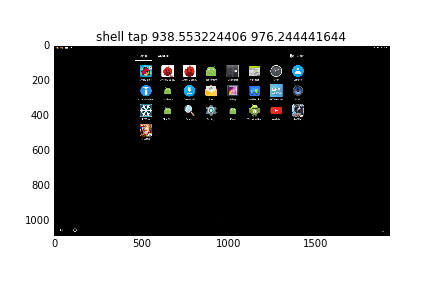

In [7]:
%matplotlib notebook
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

img=mpimg.imread('screen.png')

fig = plt.figure()

imgplot = plt.imshow(img)

plt.title('clicks - image')
    
def onclick(event):
#     adb_command(target.adb_name, 'shell tap {} {}'.format(event.x, event.y))
#     adb_command(target.adb_name, 'shell screencap -p /data/local/tmp/screen.png')
#     adb_command(target.adb_name, 'pull /data/local/tmp/screen.png')
#     target.execute("rm /data/local/tmp/screen.png")
    plt.title('shell tap {} {}'.format(event.xdata, event.ydata))
    plt.draw()  # only necessary with some backends
    adb_command(target.adb_name, 'shell input tap {} {}'.format(event.xdata, event.ydata))
    adb_command(target.adb_name, 'shell screencap -p /data/local/tmp/screen.png')
    adb_command(target.adb_name, 'pull /data/local/tmp/screen.png')
    img=mpimg.imread('screen.png')
    imgplot = plt.imshow(img)
    plt.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

def update_title():
    adb_command(target.adb_name, 'shell screencap -p /data/local/tmp/screen.png')
    adb_command(target.adb_name, 'pull /data/local/tmp/screen.png')
    img=mpimg.imread('screen.png')
    imgplot = plt.imshow(img)
    
timer = fig.canvas.new_timer(interval=5000)
timer.add_callback(update_title)
timer.start()